# Passing in Multiple Sequential Node

In [13]:
from typing import TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    age: str
    name: str
    final: str

def first_node(state:AgentState)->AgentState:
    """This is the first node of our sequence"""

    state['final'] = f"Hello {state['name']}"

    return state


def second_node(state:AgentState)->AgentState:
    """This is the second node of our sequence"""

    state['final'] += f", You are {state['age']} years old"

    return state
    

In [14]:
graph = StateGraph(AgentState)
FIRST="First Node"
SECOND="Second Node"
graph.add_node(FIRST, first_node)
graph.add_node(SECOND, second_node)

graph.set_entry_point(FIRST)
graph.add_edge(FIRST, SECOND)
graph.set_finish_point(SECOND)

app = graph.compile()

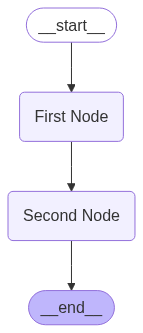

In [15]:
app

In [16]:
result = app.invoke({"name":"Janet", "age":23})
result.get('final')

'Hello Janet, You are 23 years old'